# Passive degrees of freedom



Passive dofs!



Transient Scan ID: 1     Time: 2023-08-11 02:29:49
Persistent Unique Scan ID: 'b0352b65-a3ee-47c3-bc86-d38479bfdf9c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |          x |   brownian |
+-----------+------------+------------+------------+
|         1 | 02:29:49.4 |     -3.577 |     -0.007 |
|         2 | 02:29:49.4 |      2.505 |      0.013 |
|         3 | 02:29:49.4 |      1.576 |     -0.015 |
|         4 | 02:29:49.4 |     -2.028 |     -0.029 |
|         5 | 02:29:49.4 |     -0.186 |     -0.028 |
|         6 | 02:29:49.4 |      1.228 |     -0.001 |
|         7 | 02:29:49.4 |      4.650 |      0.005 |
|         8 | 02:29:49.4 |     -4.247 |      0.033 |
|         9 | 02:29:49.4 |     -4.382 |      0.046 |
|        10 | 02:29:49.4 |      4.204 |      0.066 |
|        11 | 02:29:49.4 |      0.152 |      0.085 |
|        12 | 02:29:49.4 |     -0.950 |      0.106 |
|        13 | 02:29:49.4 |     -1.855 |      0.110 |
|        14

+-----------+------------+------------+------------+
generator list_scan ['b0352b65'] (scan num: 1)





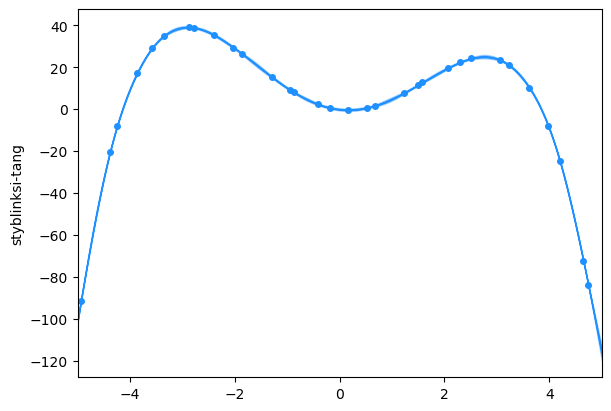

In [1]:
%run -i ../../../examples/prepare_bluesky.py # prepare the bluesky environment

from bloptools import devices, test_functions
from bloptools.bayesian import Agent


def digestion(db, uid):
    products = db[uid].table()

    for index, entry in products.iterrows():
        products.loc[index, "styblinksi-tang"] = test_functions.styblinski_tang(entry.x - 1e-1 * entry.brownian)

    return products


dofs = [
    {"device": devices.DOF(name="x"), "limits": (-5, 5), "kind": "active"},
    {"device": devices.BrownianMotion(name="brownian"), "limits": (-2, 2), "kind": "passive"},
]

tasks = [
    {"key": "styblinksi-tang", "kind": "minimize"},
]

agent = Agent(
    dofs=dofs,
    tasks=tasks,
    digestion=digestion,
    db=db,
)

RE(agent.initialize("qr", n_init=32))

agent.plot_tasks()